<h4> Importing the Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')

### Loading the data.

In [2]:
dataset = pd.read_csv('personality_datasert.csv')

### Analyzing the dataset.

In [3]:
dataset.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [5]:
dataset.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.441180,2.872608,2.221597,4.232340,2.893587
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.963354,3.000000,5.000000,3.000000
75%,7.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


#### Checking for null values.

In [6]:
dataset.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

#### Encoding the data

In [7]:
print(dataset['Stage_fear'].value_counts(),"\n")
print(dataset['Drained_after_socializing'].value_counts(),"\n")
print(dataset['Personality'].value_counts())

Stage_fear
No     1490
Yes    1410
Name: count, dtype: int64 

Drained_after_socializing
No     1493
Yes    1407
Name: count, dtype: int64 

Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64


In [8]:
ord_data = [['No','Yes']]
encoder = OrdinalEncoder(categories=ord_data)
dataset['Stage_fear'] = encoder.fit_transform(dataset[['Stage_fear']])
dataset['Drained_after_socializing'] = encoder.fit_transform(dataset[['Drained_after_socializing']])

In [9]:
ord_data_personality = [['Extrovert','Introvert']]
encoder_personality = OrdinalEncoder(categories=ord_data_personality)
dataset['Personality'] = encoder_personality.fit_transform(dataset[['Personality']])

In [10]:
dataset.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0.0,4.0,6.0,0.0,13.0,5.0,0.0
1,9.0,1.0,0.0,0.0,1.0,0.0,3.0,1.0
2,9.0,1.0,1.0,2.0,1.0,5.0,2.0,1.0
3,0.0,0.0,6.0,7.0,0.0,14.0,8.0,0.0
4,3.0,0.0,9.0,4.0,0.0,8.0,5.0,0.0


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   float64
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   float64
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   float64
dtypes: float64(8)
memory usage: 181.4 KB


#### Ploting the data.

In [12]:
def plot_features(dataset):
   #(boxplot, histogram+kde, violin, kde plot)
    numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
    fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=4, figsize=(20, len(numeric_columns) * 3))

    for i, feature in enumerate(numeric_columns):
        # Boxplot
        sns.boxplot(data=dataset, x=feature, ax=axes[i,0], color='#4a90e2')
        axes[i,0].set_title(f'Boxplot of {feature}', fontsize=14, fontweight='semibold')
        axes[i,0].set_xlabel('')
        axes[i,0].set_ylabel('')

        # Histogram with KDE
        sns.histplot(data=dataset, x=feature, ax=axes[i,1], kde=True, color='#7b68ee')
        axes[i,1].set_title(f'Histogram & KDE', fontsize=14, fontweight='semibold')
        axes[i,1].set_xlabel('')
        axes[i,1].set_ylabel('')

        # Violin plot
        sns.violinplot(data=dataset, x=feature, ax=axes[i,2], color='#50c878')
        axes[i,2].set_title(f'Violin plot', fontsize=14, fontweight='semibold')
        axes[i,2].set_xlabel('')
        axes[i,2].set_ylabel('')

        # KDE plot only
        sns.kdeplot(data=dataset, x=feature, ax=axes[i,3], fill=True, color='#e07a5f')
        axes[i,3].set_title(f'KDE plot', fontsize=14, fontweight='semibold')
        axes[i,3].set_xlabel('')
        axes[i,3].set_ylabel('')

    fig.suptitle("Descriptive analysis - Boxplots", fontsize=20, fontweight='bold', y=1.00)
    plt.tight_layout(pad=4.0)
    sns.set_style("whitegrid")
    plt.show()

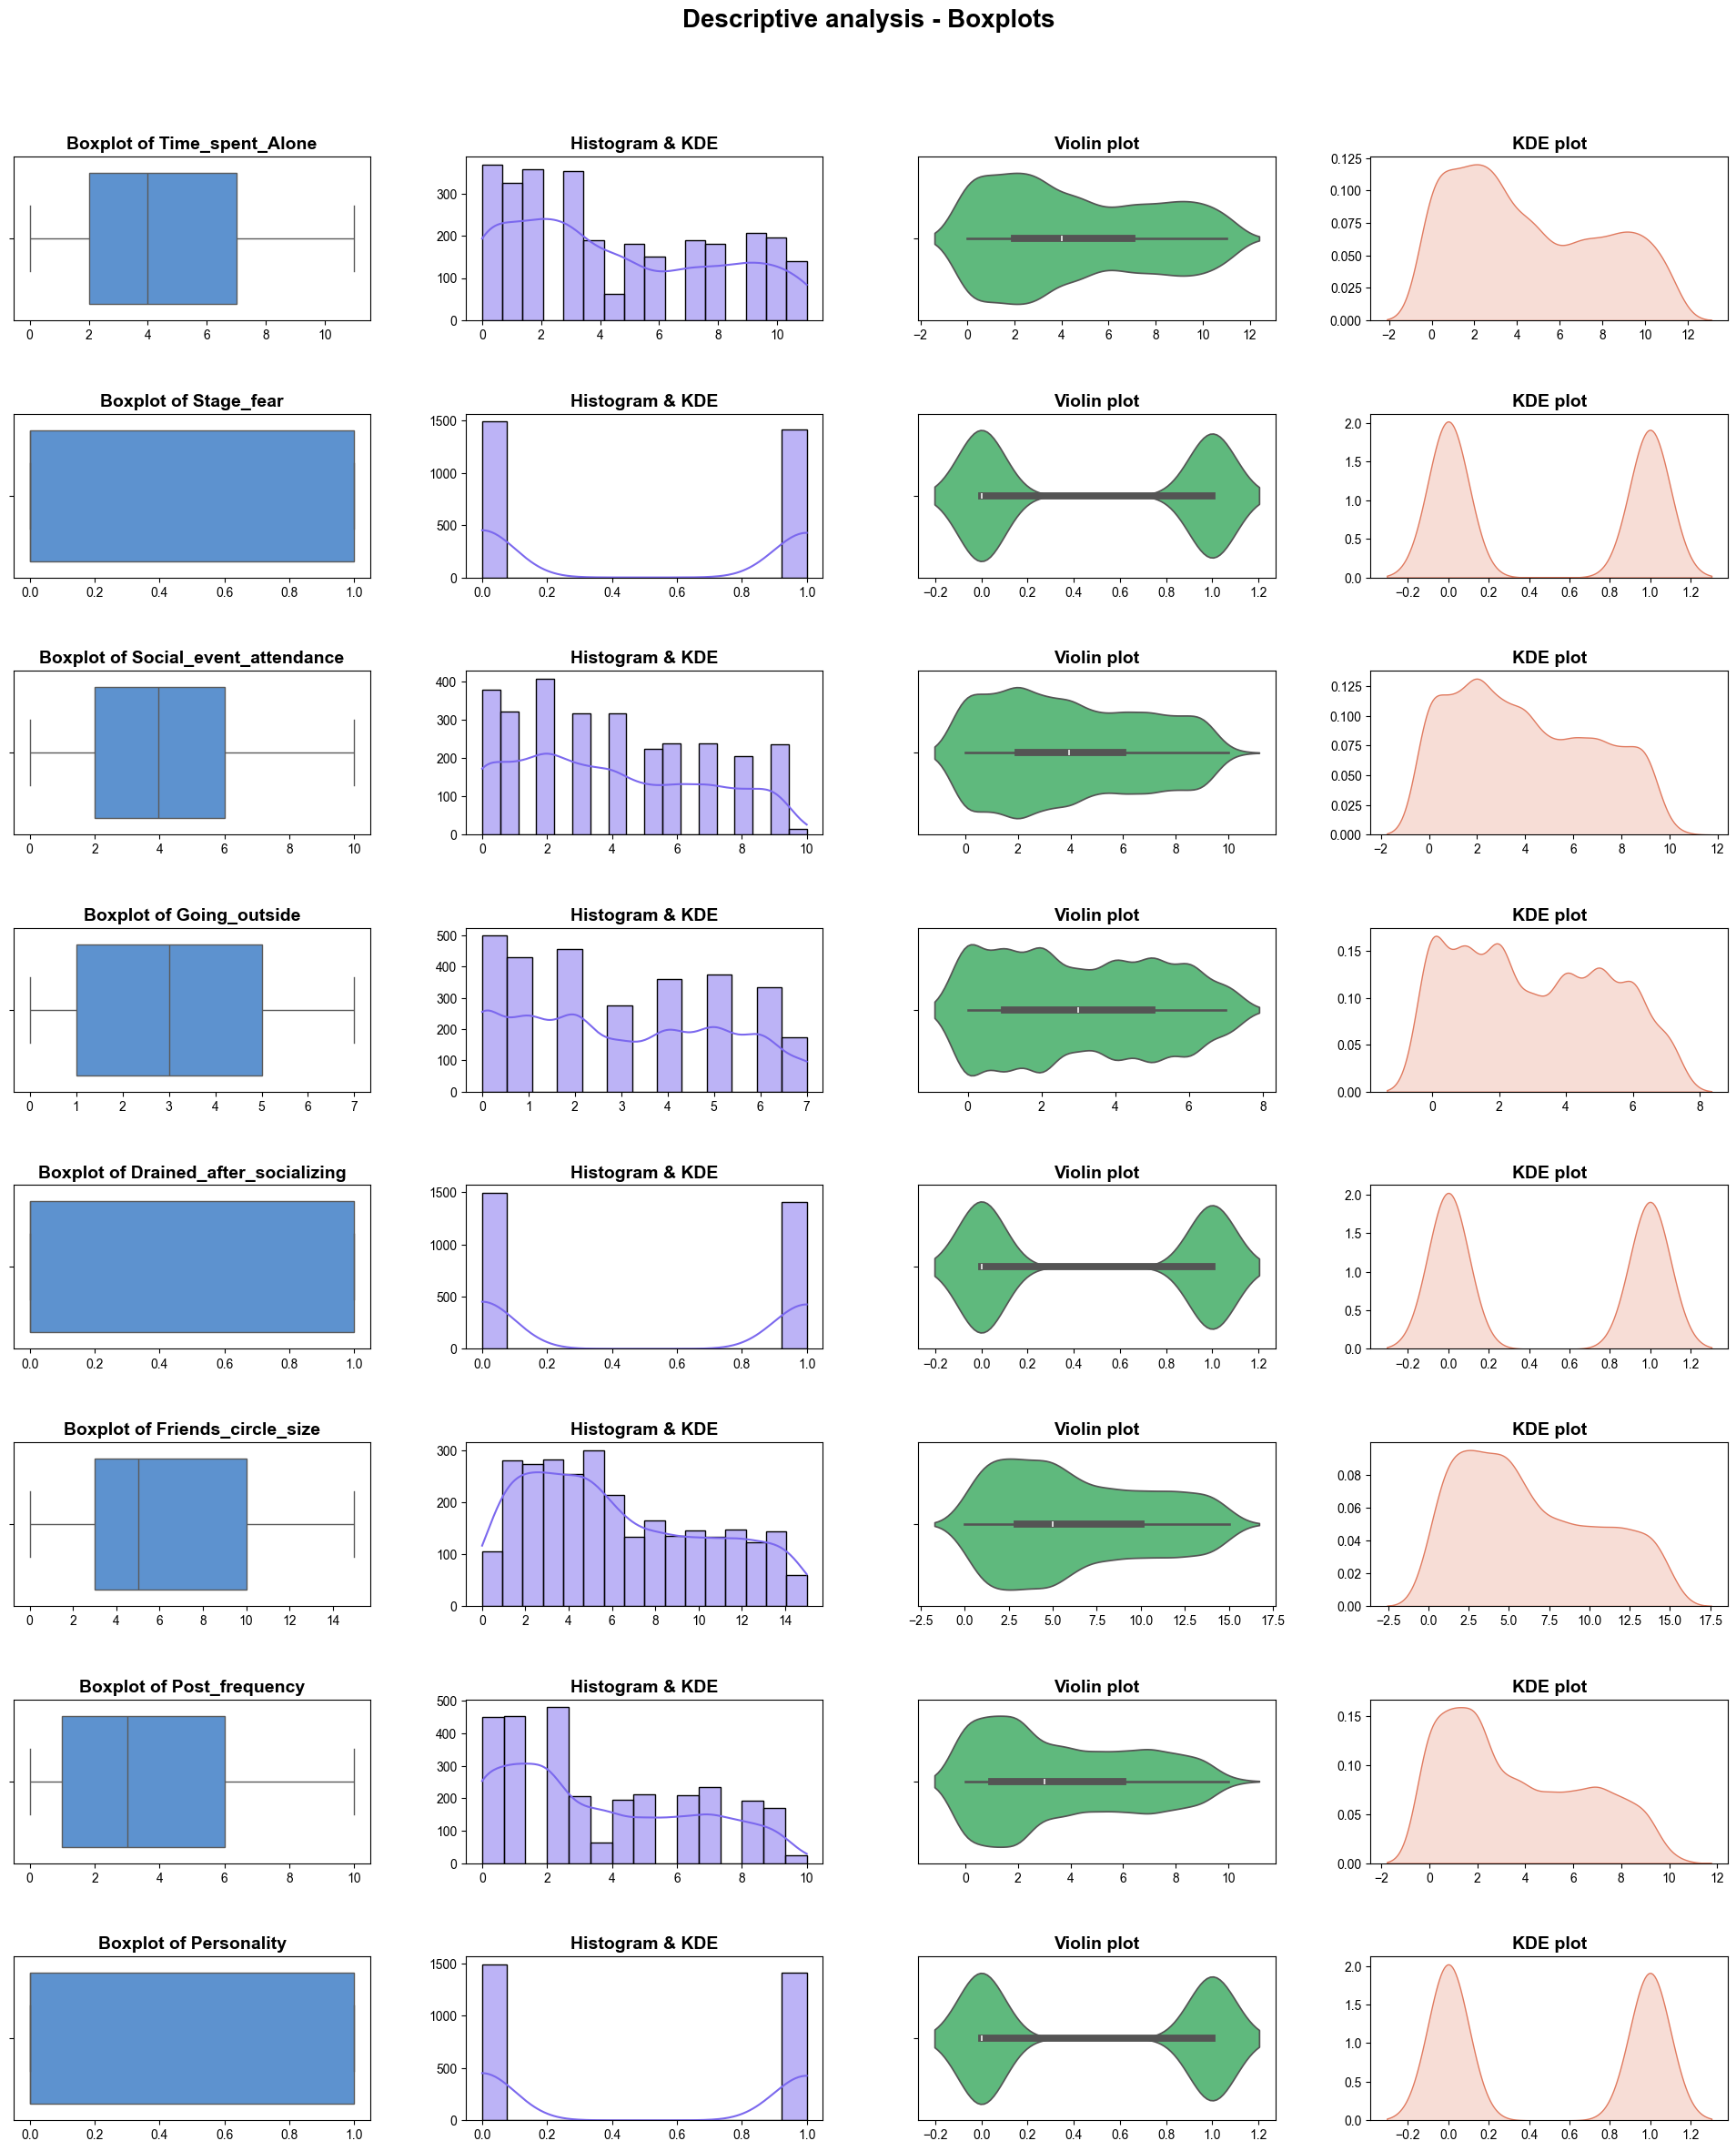

In [13]:
plot_features(dataset)

<Axes: >

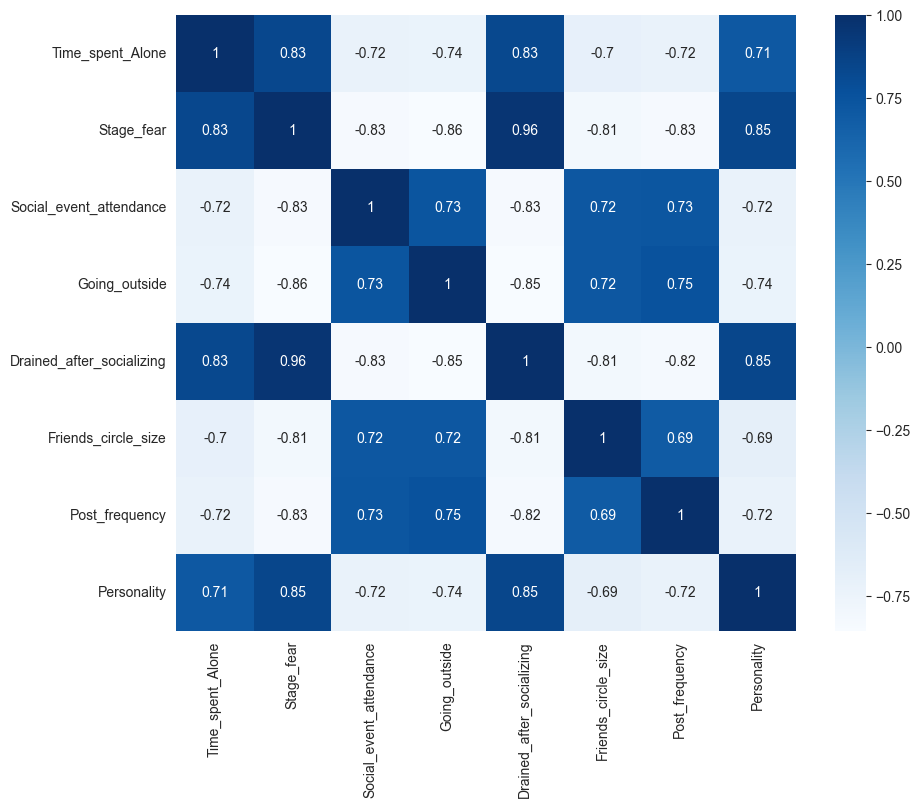

In [14]:
cmap = sns.diverging_palette(80,20, as_cmap=True)
corr= dataset.corr()
f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='Blues',annot=True)

### Model selection

In [15]:
x = dataset.drop(['Personality'],axis =1)
y = dataset['Personality']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [17]:
# Building pipelins.

dt = DecisionTreeClassifier()

rf = RandomForestClassifier()

# svc = SVC(probability=True, kernel='rbf')
svc = SVC()




# List of the models
models = [dt, rf, svc]

# Pipeliline model names
model_dict = {0: "DecisionTree", 1: "RandomForest",2: "Support vector"}


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 21, test_size=0.25)

In [19]:
acc_train = []
acc_test = []
for i, model in enumerate(models):
    model.fit(x_train, y_train)
    accuracy_train = model.score(x_train,y_train)
    accuracy_test = model.score(x_test,y_test)
    acc_train.append(accuracy_train*100)
    acc_test.append(accuracy_test*100)
    print(f"{model_dict[i]}:\nTraining --->  {accuracy_train * 100}%")
    print(f"For test --->  {accuracy_test * 100}%\n")

DecisionTree:
Training --->  98.34482758620689%
For test --->  86.62068965517241%

RandomForest:
Training --->  98.34482758620689%
For test --->  91.3103448275862%

Support vector:
Training --->  93.70114942528735%
For test --->  92.6896551724138%



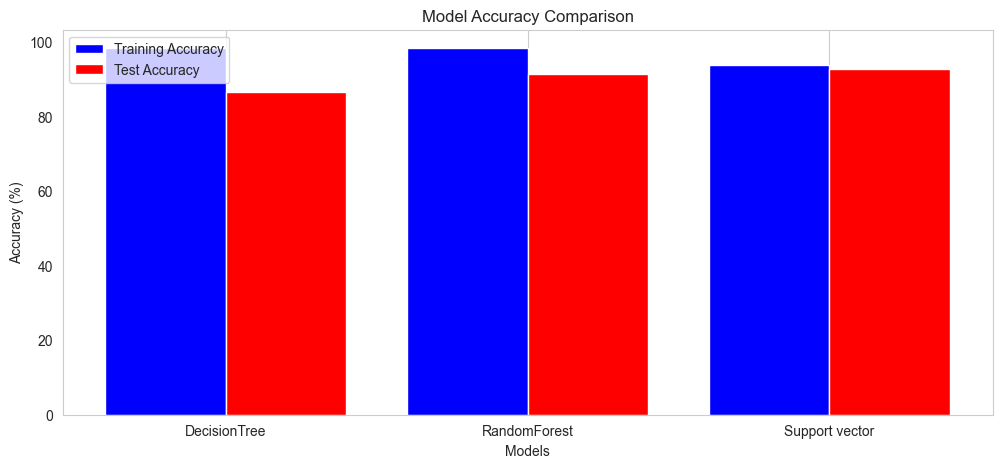

In [20]:
x = range(len(model_dict))
plt.figure(figsize=(12,5))
plt.bar(x, acc_train, width=0.4, label='Training Accuracy', color='b', align='center')
plt.bar([p + 0.4 for p in x], acc_test, width=0.4, label='Test Accuracy', color='r', align='center')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.xticks([p + 0.2 for p in x], list(model_dict.values()))
plt.grid(axis = 'y')
plt.legend()
plt.show()

In [21]:
for i, model in enumerate(models):
    print(f'The Calssification report of {model}:\n')
    y_pred = model.predict(x_test)
    print(classification_report(y_test, y_pred))


The Calssification report of DecisionTreeClassifier():

              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87       378
         1.0       0.87      0.85      0.86       347

    accuracy                           0.87       725
   macro avg       0.87      0.87      0.87       725
weighted avg       0.87      0.87      0.87       725

The Calssification report of RandomForestClassifier():

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       378
         1.0       0.91      0.91      0.91       347

    accuracy                           0.91       725
   macro avg       0.91      0.91      0.91       725
weighted avg       0.91      0.91      0.91       725

The Calssification report of SVC():

              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93       378
         1.0       0.92      0.93      0.92       347

    accuracy                     

### Hypertuning the random forest model.

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

In [23]:
param_rf = {
    'n_estimators': [i for i in range(100,1000,100)],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

In [24]:
random_search_rf = RandomizedSearchCV(RandomForestClassifier(),
                                   param_rf)
random_search_rf.fit(x_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900]})

In [25]:
print("Best parameters found: ", random_search_rf.best_params_, "\n")

best_rf = random_search_rf.best_estimator_
print(best_rf)

Best parameters found:  {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10, 'bootstrap': True} 

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=600)


In [26]:
model_random = best_rf
model_random.fit(x_train, y_train)
print("The traning accuracy of hypertuned rf model is: ",model_random.score(x_train,y_train)*100)
print("The testing accuracy of hypertuned rf model is: ",model_random.score(x_test,y_test)*100)

The traning accuracy of hypertuned rf model is:  93.70114942528735
The testing accuracy of hypertuned rf model is:  92.6896551724138


In [27]:
print(f'The Calssification report of {model_random}:\n')
y_pred_rf = model_random.predict(x_test)
print(classification_report(y_test, y_pred_rf))

The Calssification report of RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=600):

              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93       378
         1.0       0.92      0.93      0.92       347

    accuracy                           0.93       725
   macro avg       0.93      0.93      0.93       725
weighted avg       0.93      0.93      0.93       725



In [28]:
def feature_importance(model):
    importances = model.feature_importances_
    feat_imp_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': importances})
    feat_imp_df.sort_values('Importance', ascending=True).plot(kind='barh', x='Feature', y='Importance', figsize=(8, 5))
    plt.title(f"{model} Feature Importances")
    plt.tight_layout()
    plt.show()

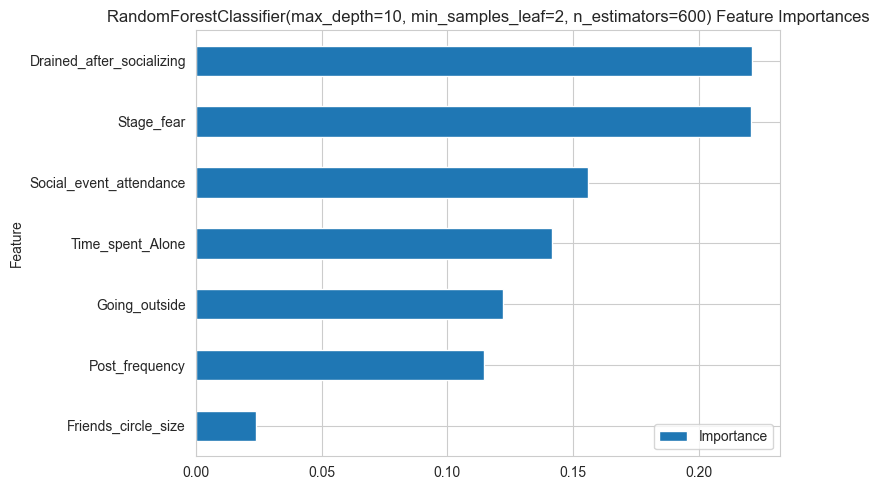

In [29]:
feature_importance(model_random)

<h4>Saving the models.

In [30]:
import pickle

# Saving SVC model 
with open("svc_model.pkl", "wb") as f:
    pickle.dump(svc, f)

# save Random forest model
with open("random_model.pkl", "wb") as f:
    pickle.dump(model_random,f)


### Shap Analysis

In [31]:
import shap
shap.initjs()

In [32]:
# SHAP for Random Forest
explainer_random = shap.Explainer(model_random)
shap_values_random = explainer_random(x_test)

In [33]:
# Shap for SVC model
explainer_svc = shap.Explainer(svc.predict, x_train)
shap_values_svc = explainer_svc(x_test)

ExactExplainer explainer: 726it [05:16,  2.29it/s]                         


In [34]:
print(shap_values_random.shape)
print(shap_values_svc.shape)

(725, 7, 2)
(725, 7)


<h4>0 --> Extrovert</h4>

<h4>1 --> Introvert</h4>

In [35]:
print(y_test[0:3])
x_test.head(3)

294     1.0
2619    1.0
766     1.0
Name: Personality, dtype: float64


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
294,7.0,1.0,1.0,2.0,1.0,1.0,1.0
2619,5.0,1.0,2.0,0.0,1.0,5.0,0.0
766,5.0,1.0,0.0,2.0,1.0,0.0,0.0


<h4> Shap graph plot for random forest

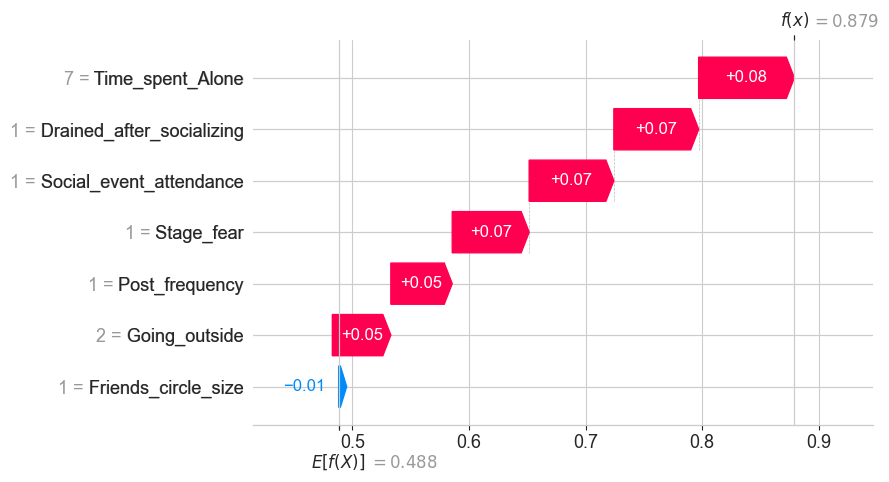

In [36]:
shap.plots.waterfall(shap_values_random[0, :, 1])  # Adjust indices as needed

<h5> "we can see that each binary feature has its own SHAP value. Take stage_fear for example. The fact that stage_fear increases the probability by +0.08 that the person is **Extrovert**. At the same time, Friends_circle_size decrease the probability. All the feature is contributing positively except one".</h5>

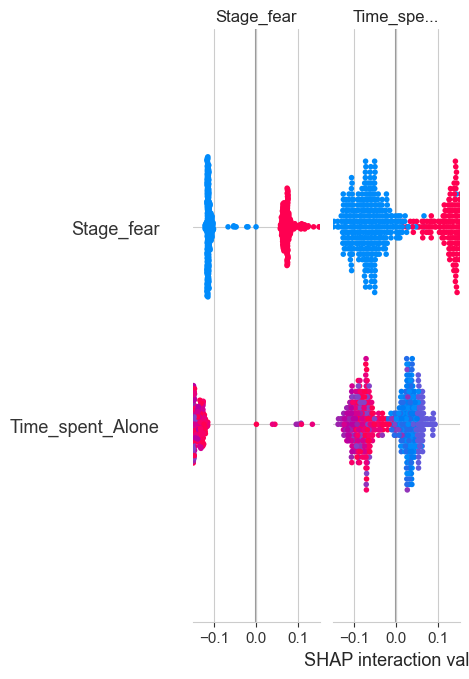

In [37]:
shap.summary_plot(shap_values_random)


<h5>"This SHAP summary plot helps identify which features most influence the Random Forest model. The plot ranks features by their average contribution to predictions. Colors indicate whether high (red) or low (blue) values push the prediction toward a specific class. This provides a global view of feature importance."

<h4> Shap graph plot for SVC model

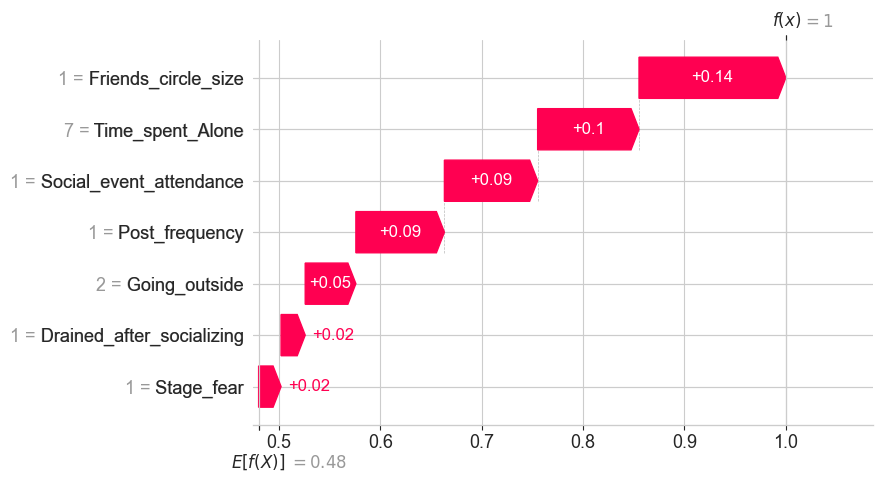

In [38]:
shap.plots.waterfall(shap_values_svc[0])  # Adjust indices as needed

<h5>"This waterfall plot explains how each feature contributed to the SVC model's prediction for a single input. However, since SVC is not tree-based, SHAP’s output may be approximate and less interpretable than Random Forest’s output."

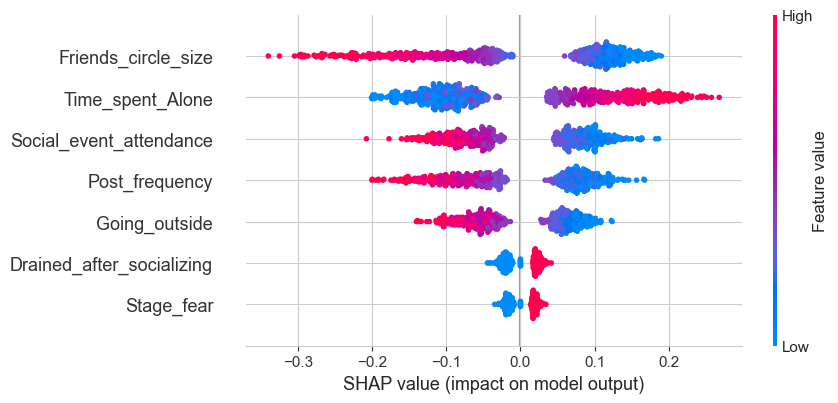

In [39]:
shap.plots.beeswarm(shap_values_svc)

<h5>"This SHAP beeswarm plot shows the distribution of SHAP values for each feature across all instances. It’s useful for understanding not just which features are important, but how their influence varies. Features with wider spreads have more variable influence across predictions."

<h3>Best Model for Explainability</h3>

<h4> Random Forest is better for these reasons:</h4>

- The Random Forest model shows more stable and interpretable SHAP results, both globally and locally.

- Correct importance given to features like Stage_fear and Drained_after_socializing were highly influential in real-life.

<h3>Conclusion: For a model that not only performs well but also explains its reasoning clearly, Random Forest is the preferred.